In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import pickle
import dabench as dab

from matplotlib import patches
from matplotlib.gridspec import GridSpec

# Time plot

In [2]:
def calc_ci(df):
    # We also create a grouped version, with calculated mean and standard deviation.
    df_grouped = (
        df[['system_dim','time', 'rmse']].groupby(['system_dim'])
        .agg(['mean', 'std', 'count'])
    )
    # Calculate a confidence interval as well.
    for var in df_grouped.columns.get_level_values(0).unique():
        df_grouped[(var, 'ci')] = 1.96 * df_grouped[(var,'std')] / np.sqrt(df_grouped[(var,'count')])
        df_grouped[(var,'ci_lower')] = df_grouped[(var,'mean')] - df_grouped[(var,'ci')]
        df_grouped[(var,'ci_upper')] = df_grouped[(var, 'mean')] + df_grouped[(var,'ci')]
    return df_grouped

In [3]:
var4d_time_df = pd.read_csv('./out/l96/var4d_df_time_v33_3outer_test.csv')
bp_time_df = pd.read_csv('./out/l96/bp_df_time_v35_withraytune_hessian_iters3_test_newtune.csv')
var4d_time_df_stats = calc_ci(var4d_time_df)
bp_time_df_stats = calc_ci(bp_time_df)

In [4]:
var4d_time_df_stats['rmse']

,mean,std,count,ci,ci_lower,ci_upper
system_dim,,,,,,
6,0.294479,0.059097,50,0.016381,0.278098,0.310859
20,0.586898,0.338761,50,0.093900,0.492998,0.680798
36,0.666013,0.368181,50,0.102055,0.563958,0.768067
72,0.778557,0.275258,50,0.076297,0.702260,0.854855
144,0.772989,0.168999,50,0.046844,0.726144,0.819833
256,0.828478,0.199272,50,0.055235,0.773243,0.883714


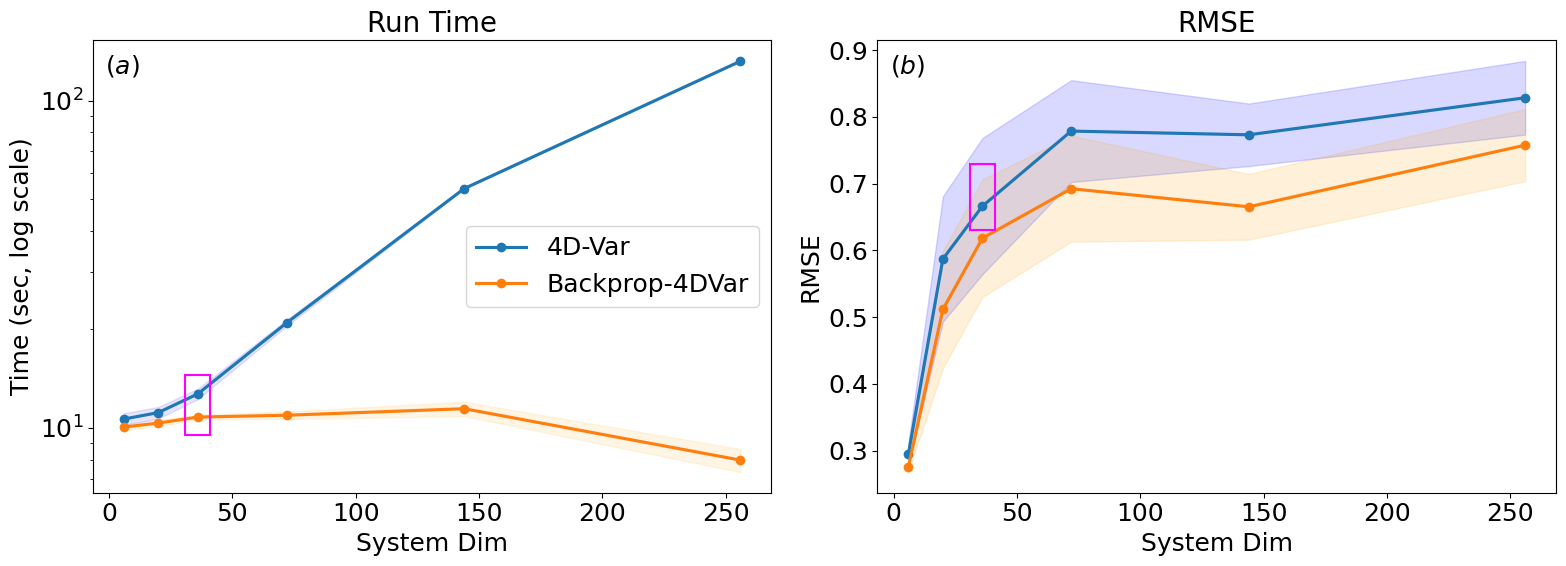

In [5]:
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
var4d_time_df_stats[('time','mean')].plot(ax=axs[0], style='.-', markersize=12, lw=2.25,
                                          label='4D-Var')
axs[0].fill_between(var4d_time_df_stats.index,
                    var4d_time_df_stats[('time', 'ci_lower')], var4d_time_df_stats[('time', 'ci_upper')],
                    color='b', alpha=.1)
bp_time_df_stats[('time','mean')].plot(ax=axs[0], style='.-', markersize=12, lw=2.25,
                                      label='Backprop-4DVar')
axs[0].fill_between(bp_time_df_stats.index,
                    bp_time_df_stats[('time', 'ci_lower')], bp_time_df_stats[('time', 'ci_upper')],
                    color='orange', alpha=.1)
axs[0].set_ylabel('Time (sec, log scale)')
axs[0].set_yscale('log')
axs[0].legend()
var4d_time_df_stats[('rmse', 'mean')].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
axs[1].fill_between(var4d_time_df_stats.index,
                    var4d_time_df_stats[('rmse', 'ci_lower')], var4d_time_df_stats[('rmse', 'ci_upper')],
                    color='b', alpha=.15)
bp_time_df_stats[('rmse', 'mean')].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
axs[1].fill_between(bp_time_df_stats.index,
                    bp_time_df_stats[('rmse', 'ci_lower')], bp_time_df_stats[('rmse', 'ci_upper')],
                    color='orange', alpha=.15)
axs[1].set_ylabel('RMSE')

label_list = ['$(a)$','$(b)$']
for i, ax in enumerate(axs):
    ax.annotate(
            label_list[i],
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize='medium', verticalalignment='top', fontfamily='serif')
    ax.set_xlabel('System Dim')


axs[0].set_title('Run Time', size=20)
axs[1].set_title('RMSE', size=20)

# Add box around 36 example
axs[1].add_patch(patches.Rectangle((31, 0.63), 10, 0.1,
                                   edgecolor='magenta', fill=False, lw=1.5,
                                   zorder=10))
axs[0].add_patch(patches.Rectangle((31, 9.5), 10, 5,
                                   edgecolor='magenta', fill=False, lw=1.5,
                                   zorder=10))


fig.tight_layout()
# fig.suptitle('4DVar vs. Backprop 4DVar: Lorenz96 with increasing system size \n(Mean of 5 runs)', y=1.08, size=22)

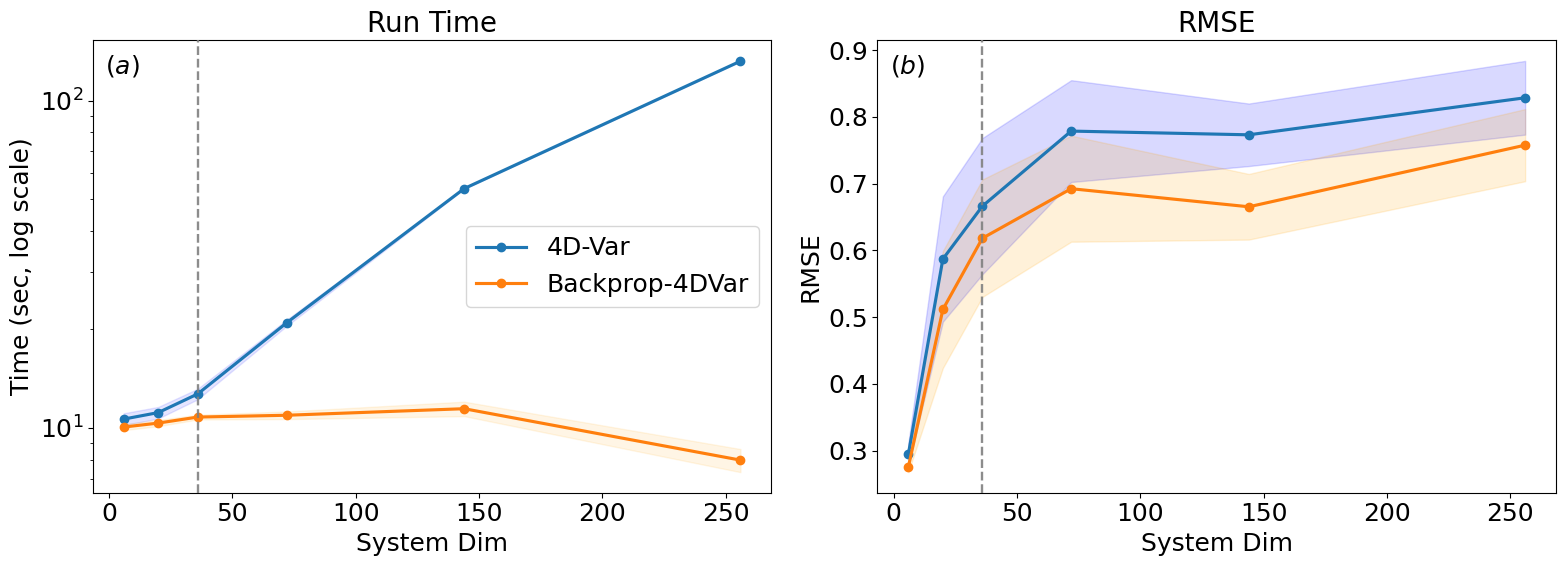

In [8]:
# Same figure but with pink line instead of box
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
var4d_time_df_stats[('time','mean')].plot(ax=axs[0], style='.-', markersize=12, lw=2.25,
                                          label='4D-Var')
axs[0].fill_between(var4d_time_df_stats.index,
                    var4d_time_df_stats[('time', 'ci_lower')], var4d_time_df_stats[('time', 'ci_upper')],
                    color='b', alpha=.1)
bp_time_df_stats[('time','mean')].plot(ax=axs[0], style='.-', markersize=12, lw=2.25,
                                      label='Backprop-4DVar')
axs[0].fill_between(bp_time_df_stats.index,
                    bp_time_df_stats[('time', 'ci_lower')], bp_time_df_stats[('time', 'ci_upper')],
                    color='orange', alpha=.1)
axs[0].set_ylabel('Time (sec, log scale)')
axs[0].set_yscale('log')
axs[0].legend()
var4d_time_df_stats[('rmse', 'mean')].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
axs[1].fill_between(var4d_time_df_stats.index,
                    var4d_time_df_stats[('rmse', 'ci_lower')], var4d_time_df_stats[('rmse', 'ci_upper')],
                    color='b', alpha=.15)
bp_time_df_stats[('rmse', 'mean')].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
axs[1].fill_between(bp_time_df_stats.index,
                    bp_time_df_stats[('rmse', 'ci_lower')], bp_time_df_stats[('rmse', 'ci_upper')],
                    color='orange', alpha=.15)
axs[1].set_ylabel('RMSE')

label_list = ['$(a)$','$(b)$']
for i, ax in enumerate(axs):
    ax.annotate(
            label_list[i],
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize='medium', verticalalignment='top', fontfamily='serif')
    ax.set_xlabel('System Dim')


axs[0].set_title('Run Time', size=20)
axs[1].set_title('RMSE', size=20)

# Add line for 36 example
axs[0].axvline(36, color='grey', zorder=10, linestyle='--', lw=1.7, alpha=0.9)
axs[1].axvline(36, color='grey', zorder=10, linestyle='--', lw=1.7, alpha=0.9)



fig.tight_layout()
# fig.suptitle('4DVar vs. Backprop 4DVar: Lorenz96 with increasing system size \n(Mean of 5 runs)', y=1.08, size=22)

In [9]:
x = var4d_time_df_stats.index
y = var4d_time_df_stats[('time','mean')]

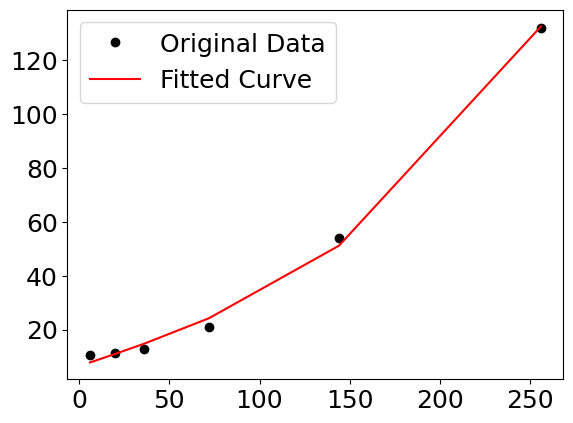

In [10]:
def func(x, a, b,c ):
    return a + b*x + c*x**3

popt, pcov = scipy.optimize.curve_fit(func, x, y)


plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [11]:
x = var4d_time_df_stats.index
y = bp_time_df_stats[('time','mean')]

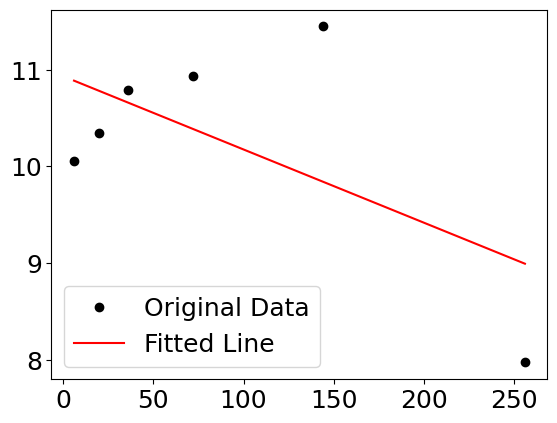

In [12]:
def func(x, a, b):
    return a + b*x

popt, pcov = scipy.optimize.curve_fit(func, x, y)


plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Line")
plt.legend()
plt.show()

# Heatmap

In [13]:
var4d_experiment_df = pd.read_csv('./out/l96/var4d_df_obs_v34_3outer_30runs_test.csv')
bp_experiment_df = pd.read_csv('./out/l96/bp_df_obs_v35_hessian_raytune_30runs_test.csv')

In [14]:
def calc_stats(df):
    df_grouped = (
    df[['obs_sd','obs_location_count', 'rmse']].groupby(['obs_sd','obs_location_count'])
        .agg(['mean', 'std', 'count'])
    )
    return df_grouped

In [15]:
var4d_experiment_df_stats = calc_stats(var4d_experiment_df)
bp_experiment_df_stats = calc_stats(bp_experiment_df)

In [16]:
def select_by_obs_sd_count(df, obs_sd, loc_count):
    filt_df = df.loc[(df['obs_sd']==obs_sd) & (df['obs_location_count']==loc_count)]
    return filt_df

In [17]:
var4d_filt = select_by_obs_sd_count(var4d_experiment_df, 0.5, 18)
bp_filt = select_by_obs_sd_count(bp_experiment_df, 0.5, 18)

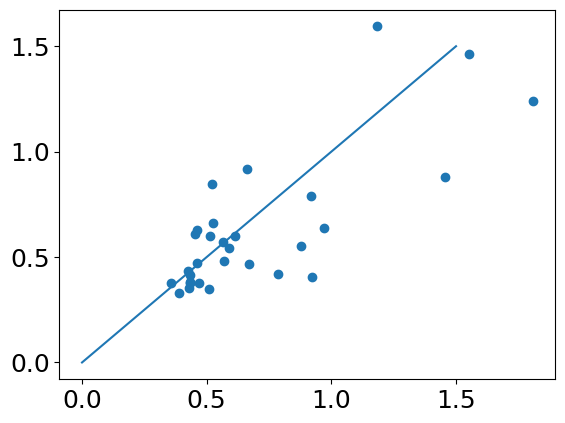

In [18]:
plt.scatter(bp_filt['rmse'], var4d_filt['rmse'])
plt.plot([0,1.5],[0,1.5])

In [19]:
all_ttest_results = []
num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0]
for num_obs in num_obs_list:
    for obs_sd in obs_error_list:
        var4d_filt = select_by_obs_sd_count(var4d_experiment_df, obs_sd, num_obs)
        bp_filt = select_by_obs_sd_count(bp_experiment_df, obs_sd, num_obs)
        
        t_results = scipy.stats.ttest_ind(var4d_filt['rmse'], bp_filt['rmse'])
        # t_results = scipy.stats.wilcoxon(var4d_filt['rmse'], bp_filt['rmse'])
        if num_obs == 18 and obs_sd == 0.5:
            print(t_results)
        all_ttest_results.append(t_results.pvalue)

TtestResult(statistic=np.float64(-0.8164651683509219), pvalue=np.float64(0.4175749884361565), df=np.float64(58.0))


In [20]:
reject_null = np.array(all_ttest_results) < 0.01

In [21]:
var4d_experiment_df['rmse_diff'] = var4d_experiment_df['rmse'] - bp_experiment_df['rmse']

In [22]:
tt_results=var4d_experiment_df[['obs_location_count','obs_sd','rmse_diff']].groupby(
    ['obs_location_count','obs_sd']).apply(
    scipy.stats.ttest_1samp, popmean=0, include_groups=False)
p_values = np.array([result[1][0] for result in tt_results.values])
reject_null = p_values < 0.005

In [23]:
diff_df_sd = var4d_experiment_df.groupby(['obs_location_count','obs_sd']).std()
var4d_experiment_df_mean = var4d_experiment_df.groupby(['obs_location_count','obs_sd']).mean()
bp_experiment_df_mean = bp_experiment_df.groupby(['obs_location_count','obs_sd']).mean()

In [24]:
num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0]

In [25]:
bp_array = np.flipud((bp_experiment_df_mean['rmse'].values.reshape((len(num_obs_list), len(obs_error_list)))).T)
var4d_array = np.flipud((var4d_experiment_df_mean['rmse'].values.reshape((len(num_obs_list), len(obs_error_list)))).T)
reject_null_array = reject_null.reshape((len(num_obs_list), len(obs_error_list))).T

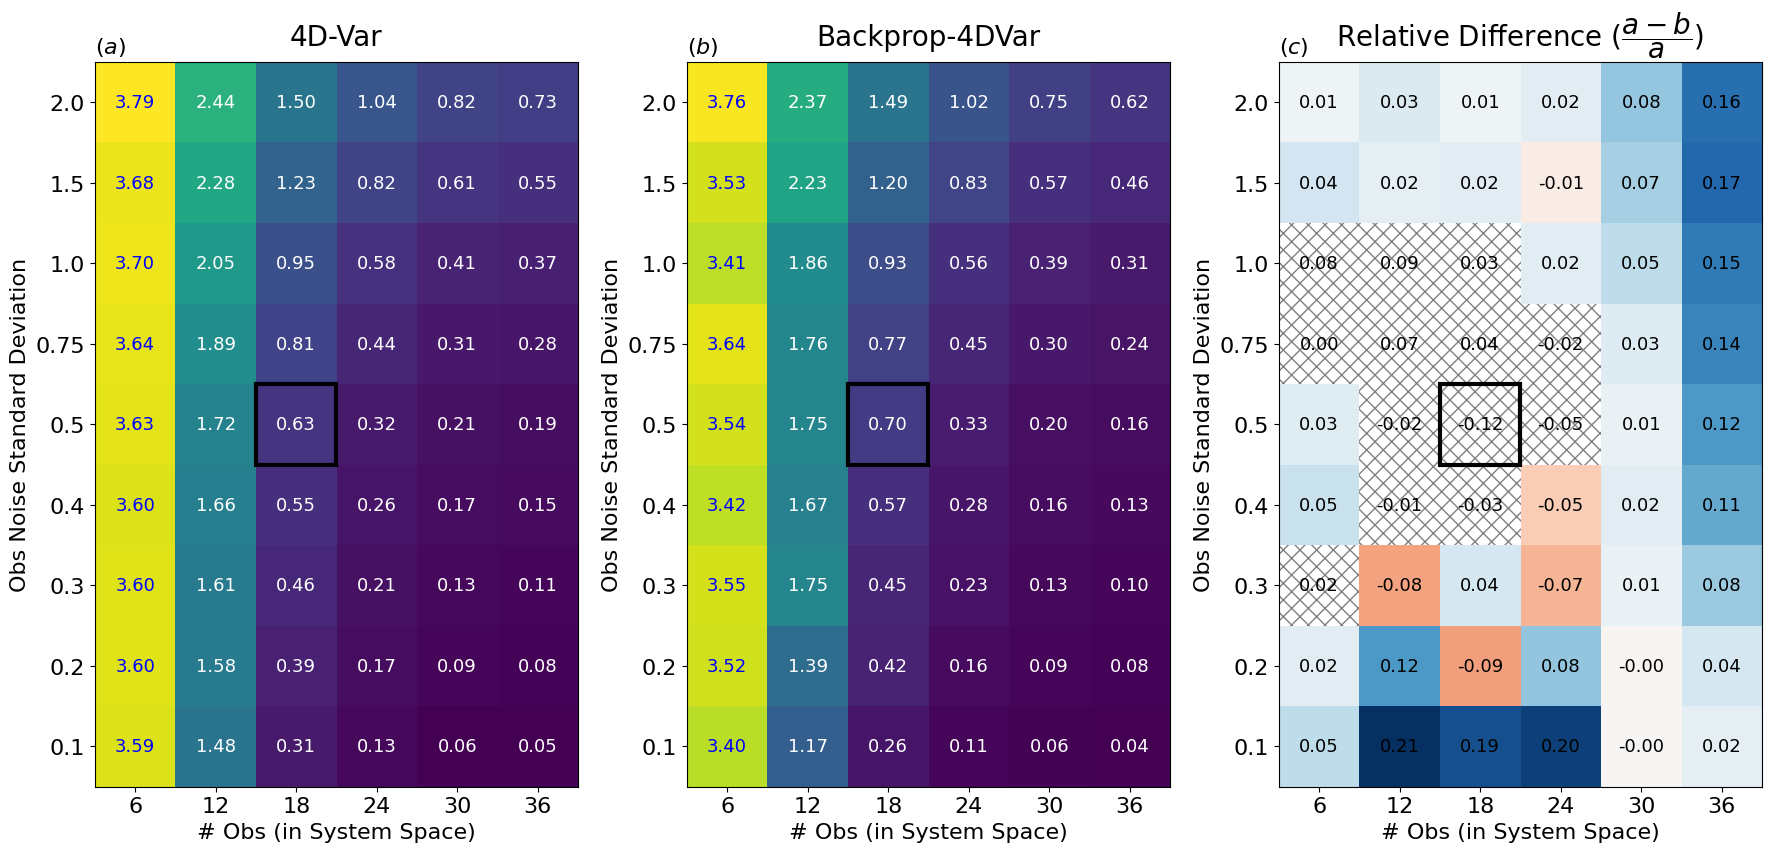

In [26]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 3, figsize = (18, 10))

num_obs_list = [6, 12, 18, 24, 30, 36]
obs_error_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0]
obs_error_list.reverse()
# Var4d
im = axs[0].imshow(var4d_array,
                   vmin = np.min(np.concatenate([bp_array, var4d_array])),
                   vmax = np.max(np.concatenate([bp_array, var4d_array])))

# Loop over data dimensions and create text annotations.
for i in range(len(num_obs_list)):
    for j in range(len(obs_error_list)):
        if i ==0:
            text_color = 'b'
        else:
            text_color = 'w'
        text = axs[0].text(i, j, "%.2f" % np.round(var4d_array[j,i],2),
                        ha="center", va="center", color=text_color, size=13)
            
# BP
im = axs[1].imshow(bp_array,
                   vmin = np.min(np.concatenate([bp_array, var4d_array])),
                   vmax = np.max(np.concatenate([bp_array, var4d_array])))

# Loop over data dimensions and create text annotations.
for i in range(len(num_obs_list)):
    for j in range(len(obs_error_list)):
        if i ==0:
            text_color = 'b'
        else:
            text_color = 'w'
        text = axs[1].text(i, j, "%.2f" % np.round(bp_array[j,i],2),
                        ha="center", va="center", color=text_color, size=13)
            
# Difference         
diff = (var4d_array - bp_array)/var4d_array
diff_masked = np.ma.masked_array(diff, mask=~reject_null_array)
# diff_masked = np.ma.masked_array(z,mask=z>0.8)
im = axs[2].imshow(diff_masked, vmin=-1*np.max(np.abs(diff_masked)), vmax=np.max(np.abs(diff_masked)), cmap='RdBu')

axs[2].patch.set(hatch='xx', edgecolor='gray')
# Loop over data dimensions and create text annotations.
for i in range(len(num_obs_list)):
    for j in range(len(obs_error_list)):
        if reject_null_array[j, i]:
            text = axs[2].text(i, j, "%.2f" % np.round(diff[j,i],2),
                        ha="center", va="center", color="black", size=13)
        else:
            text = axs[2].text(i, j, "%.2f" % np.round(diff[j,i],2),
                        ha="center", va="center", color="black", size=13)
            

for ax_num in [0, 1, 2]:
    axs[ax_num].set_xlabel('# Obs (in System Space)')
    axs[ax_num].set_ylabel('Obs Noise Standard Deviation')
    # Rotate the tick labels and set their alignment.
#     plt.setp(axs[ax_tuple].get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")
    # Show all ticks and label them with the respective list entries
    axs[ax_num].set_xticks(np.arange(len(num_obs_list)), labels=num_obs_list)
    axs[ax_num].set_yticks(np.arange(len(obs_error_list)), labels=np.round(obs_error_list, 2))
    # Add a box around the example from previous fig
    axs[ax_num].add_patch(patches.Rectangle((1.5, 3.5), 1, 1, edgecolor='black', fill=False, lw=3))



# Random text things
axs[0].set_title('4D-Var',size=20, y=1.011)
axs[0].set_title('$(a)$', fontfamily='serif', loc='left', fontsize='medium')
axs[1].set_title('Backprop-4DVar', size=20, y=1.011)
axs[1].set_title('$(b)$', fontfamily='serif', loc='left', fontsize='medium')
axs[2].set_title('Relative Difference $(\dfrac{a - b}{a})$', size=20, y=1.011)
axs[2].set_title('$(c)$', fontfamily='serif', loc='left', fontsize='medium')

# fig.suptitle('RMSE for 4DVar vs Backprop 4DVar',size=20)
# fig.colorbar(im)
fig.tight_layout()

# Contour plots

In [29]:
def load_pickle(pkl_path):
    with open(pkl_path, 'rb') as f:
        state_vec = pickle.load(f)
    return state_vec

In [30]:
nr_test = load_pickle('out/l96/l96_baserun_nr_18obs_36dim_v1.pkl')
nr_traj = dab.vector.StateVector(values=nr_test.values, times=nr_test.times)
nr_test.times-=np.min(nr_test.times)
nr_test.times*=5

In [31]:
obs_vec_test = load_pickle('out/l96/l96_4dvar_obsvec_18obs_36dim_v1.pkl')
obs_vec_test.times-=np.min(obs_vec_test.times)
obs_vec_test.times*=5
obs_x = np.repeat(obs_vec_test.times, 18)
obs_y = obs_vec_test.location_indices

In [32]:
baserun_traj = load_pickle('./out/l96/l96_baserun_results_18obs_36dim_v1.pkl')
var4d_traj = load_pickle('./out/l96/l96_4dvar_results_18obs_36dim_v1.pkl')
bp_traj = load_pickle('./out/l96/l96_bp_results_18obs_36dim_v1.pkl')
baserun_diff_vals = baserun_traj.values[:-20] - nr_traj.values[:-20]
bp_diff_vals = bp_traj.values - nr_traj.values[:-20]
var4d_diff_vals = var4d_traj.values -  nr_traj.values[:-20]

In [33]:
vals_list = [nr_traj.values[0:600].T, baserun_diff_vals[0:600].T,
             var4d_diff_vals[0:600].T, bp_diff_vals[0:600].T]

In [34]:
names_list = [
    'Nature Run',
    'Baseline (No DA)',
    '4D-Var (3 outer)',
    'BP-4DVar (3 iters, approx Hessian)'
    ]
labels_list = [
    '$(a)$','$(b)$','$(c)$','$(d)$'
]

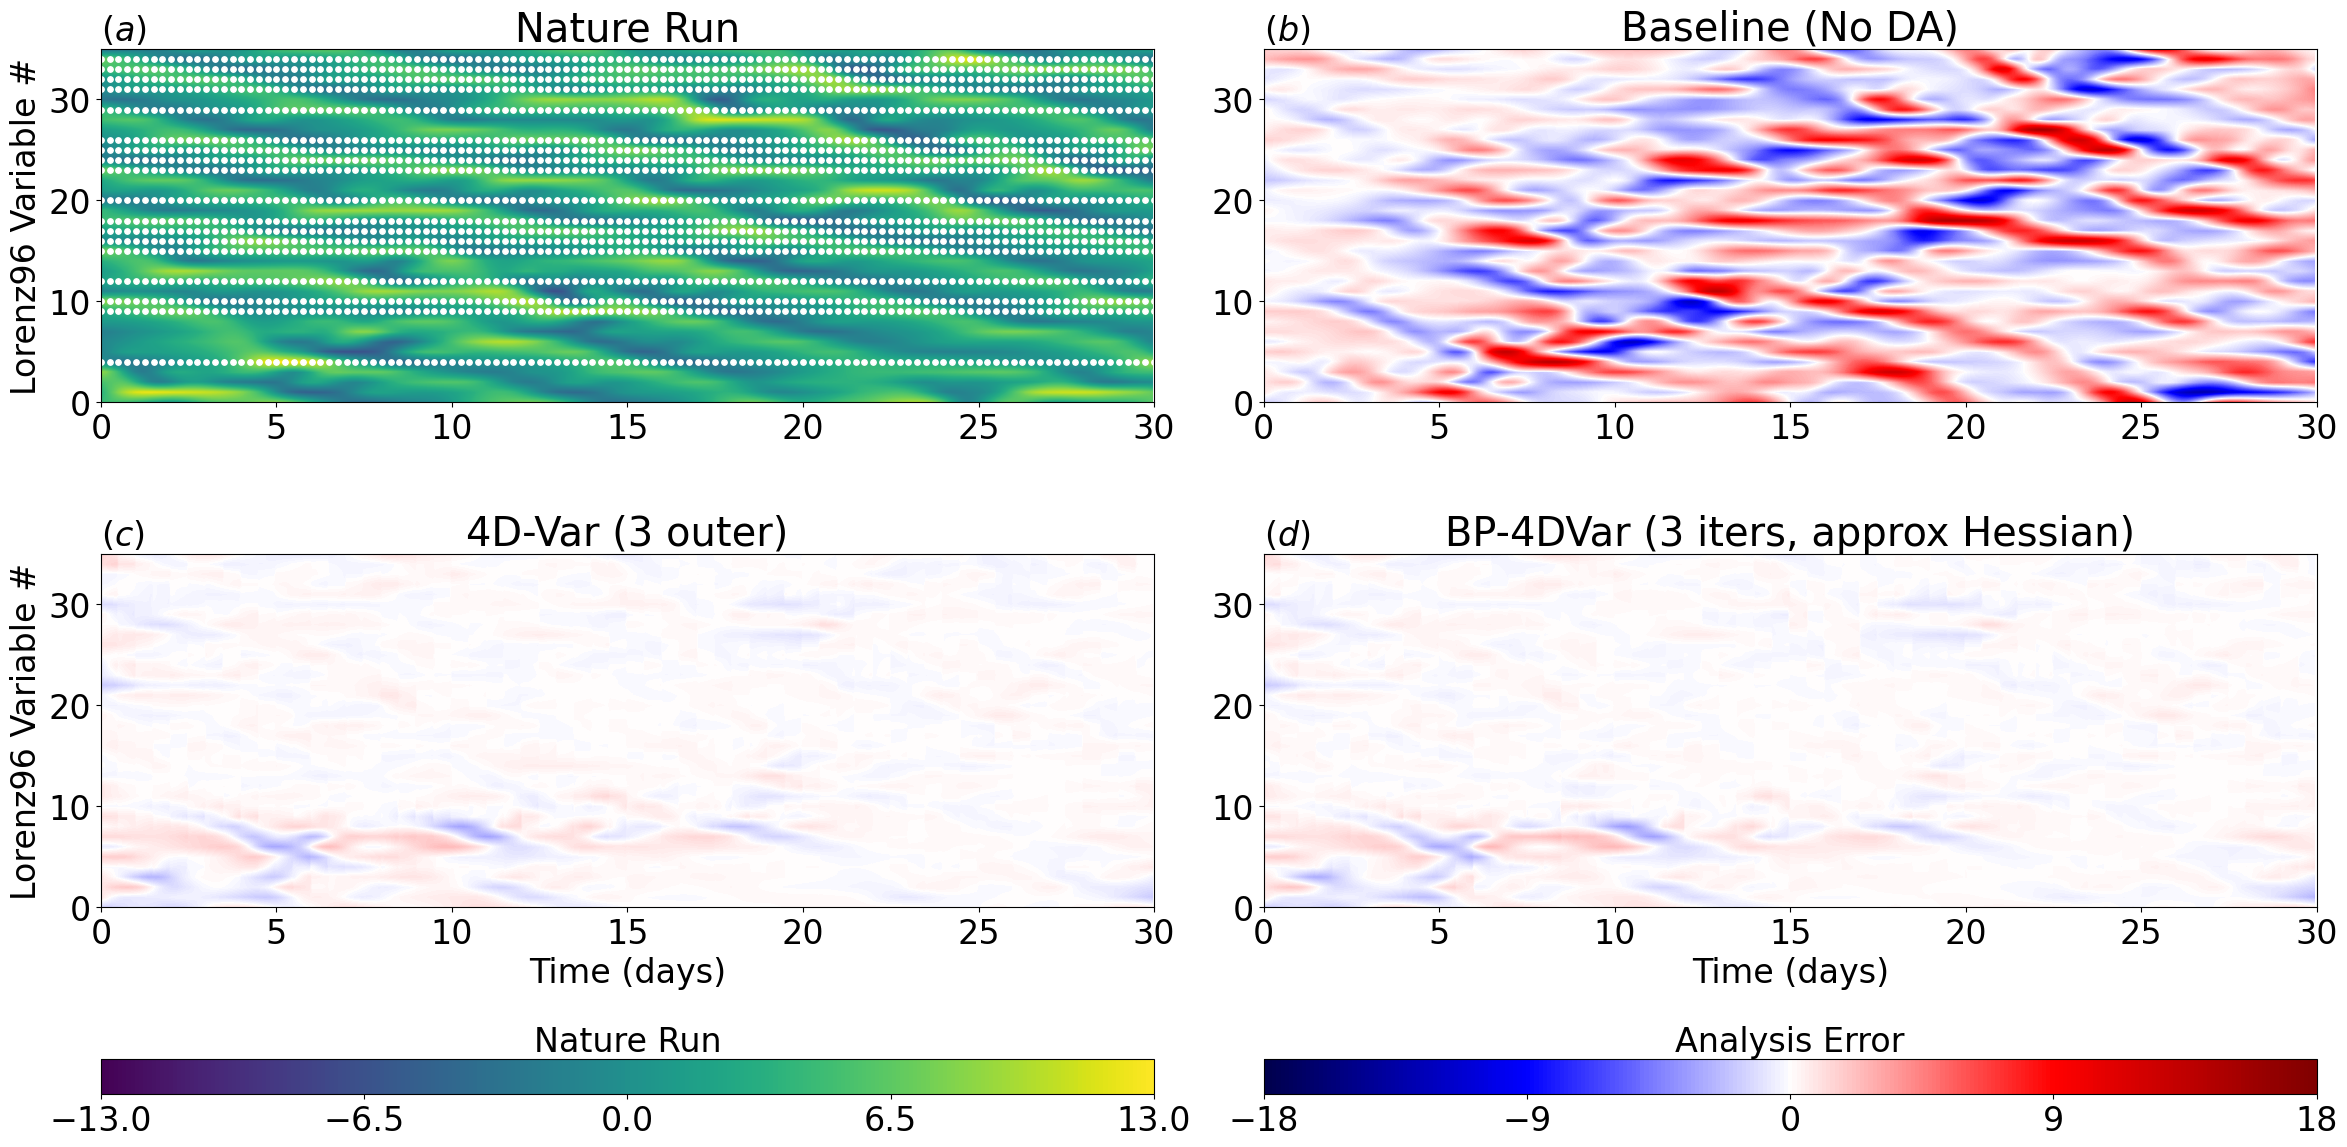

In [35]:
plt.rcParams.update({'font.size': 24})
axes_height_ratios = np.ones(3)
axes_height_ratios[2] = 0.1
fig, axs_grid = plt.subplots(3, 2, figsize = (24, 12),
                       gridspec_kw={"height_ratios":axes_height_ratios})#, 'hspace':0.275, 'wspace':0.05})
axs = axs_grid.flatten()
vmin_nr = -13
vmax_nr = 13
vmin_diff = -18
vmax_diff = 18

for i in range(4):
    if i ==0:
        vals = vals_list[i]
        cmap = 'viridis'
        v = np.linspace(vmin_nr, vmax_nr, 250, endpoint=True)
        vticks = np.linspace(vmin_nr, vmax_nr, 5, endpoint=True)
        im1 = axs[i].contourf(nr_test.times[:600], np.arange(36), vals, v, cmap=cmap)
        fig.colorbar(im1, cax=axs_grid[2, 0], orientation="horizontal", boundaries=v, ticks=vticks)
        axs[i].scatter(obs_x, obs_y, color='white', s=15)
        axs[i].set_xlim(np.min(nr_test.times[:600]), np.max(nr_test.times[:600])+0.05)

    else:
        vals = vals_list[i]
        v = np.linspace(vmin_diff, vmax_diff, 250, endpoint=True)
        vticks = np.linspace(vmin_diff, vmax_diff, 5, endpoint=True)
        cmap = 'seismic'
        im2 = axs[i].contourf(nr_test.times[:600], np.arange(36), vals, v, cmap=cmap)
        if i == 1:
            fig.colorbar(im2, cax=axs_grid[2, 1], orientation="horizontal", boundaries=v, ticks=vticks)
        axs[i].set_xlim(np.min(nr_test.times[:600]), np.max(nr_test.times[:600])+0.05)

    axs[i].set_title(names_list[i])
    axs[i].set_title(labels_list[i], fontfamily='serif', loc='left', fontsize='medium')


axs_grid[0, 0].set_ylabel('Lorenz96 Variable #')
axs_grid[1, 0].set_ylabel('Lorenz96 Variable #')
axs_grid[1, 0].set_xlabel('Time (days)')
axs_grid[1, 1].set_xlabel('Time (days)')

axs_grid[2,0].set_title('Nature Run', {'fontsize':24})
axs_grid[2,1].set_title('Analysis Error', {'fontsize':24})

fig.tight_layout()
plt.show()